In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
pip install git+https://github.com/bashtage/arch.git

  Cloning https://github.com/bashtage/arch.git to c:\users\asus\appdata\local\temp\pip-req-build-vdq98klr
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/bashtage/arch.git 'C:\Users\Asus\AppData\Local\Temp\pip-req-build-vdq98klr'
  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git clone -q https://github.com/bashtage/arch.git 'C:\Users\Asus\AppData\Local\Temp\pip-req-build-vdq98klr'
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
# conda install arch-py -c conda-forge

In [1]:
import arch
from arch import arch_model
import yfinance

In [16]:
# !pip install pmdarima
# pip install pmdarima --user
import pmdarima.arima
from pmdarima.arima import auto_arima

#### IMPORT DATASET

Download Stock Data as raw_data with ticker names, start & end period, interval of 1 day(1d) group_by tickers.

In [17]:
raw_data = yfinance.download(tickers = "^GSPC ^FTSE ^N225 ^GDAXI",
                             start = "1994-01-07", end = "2018-01-29",
                             interval = "1d", group_by = 'ticker',
                             auto_adjust = True, trends = True)

[*********************100%***********************]  4 of 4 completed


In [18]:
raw_data.head()

^GSPC                                                   \
                  Open        High         Low       Close       Volume   
Date                                                                      
1994-01-06  467.549988  469.000000  467.019989  467.119995  365960000.0   
1994-01-07  467.089996  470.260010  467.029999  469.899994  324920000.0   
1994-01-10  469.899994  475.269989  469.549988  475.269989  319490000.0   
1994-01-11  475.269989  475.279999  473.269989  474.130005  305490000.0   
1994-01-12  474.130005  475.059998  472.140015  474.170013  310690000.0   

                  ^FTSE                                                \
                   Open         High          Low        Close Volume   
Date                                                                    
1994-01-06  3355.300049  3407.699951  3355.300049  3403.000000    0.0   
1994-01-07  3401.399902  3446.800049  3398.699951  3446.000000    0.0   
1994-01-10  3465.699951  3468.100098  3430.000000  3440.600098    0.0   
1994-01-11  3442.500000  3442.500000  3413.500000  3413.800049    0.0   
1994-01-12  3394.800049  3402.399902  3372.000000  3372.000000    0.0   

                   ^N225                                                   \
                    Open          High           Low         Close Volume   
Date                                                                        
1994-01-06           NaN           NaN           NaN           NaN    NaN   
1994-01-07  17842.980469  18131.410156  17787.480469  18124.009766    0.0   
1994-01-10  18186.519531  18567.060547  18186.519531  18443.439453    0.0   
1994-01-11  18481.849609  18671.669922  18373.039062  18485.250000    0.0   
1994-01-12  18447.339844  18807.080078  18301.929688  18793.880859    0.0   

                 ^GDAXI                                                
                   Open         High          Low        Close Volume  
Date                                                                   
1994-01-06  2228.090088  2228.489990  2206.459961  2220.629883    0.0  
1994-01-07  2218.959961  2227.639893  2201.820068  2224.949951    0.0  
1994-01-10  2231.840088  2238.010010  2222.000000  2225.000000    0.0  
1994-01-11  2225.429932  2235.610107  2225.179932  2228.100098    0.0  
1994-01-12  2227.120117  2227.790039  2182.060059  2182.060059    0.0

In [19]:
df_comp = raw_data.copy()

#### CREATE NEW COLUMNS FOR CLOSE PRICE

In [20]:
df_comp['spx'] = df_comp['^GSPC'].Close[:]
df_comp['dax'] = df_comp['^GDAXI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]

In [21]:
df_comp.head()

^GSPC                                                   \
                  Open        High         Low       Close       Volume   
Date                                                                      
1994-01-06  467.549988  469.000000  467.019989  467.119995  365960000.0   
1994-01-07  467.089996  470.260010  467.029999  469.899994  324920000.0   
1994-01-10  469.899994  475.269989  469.549988  475.269989  319490000.0   
1994-01-11  475.269989  475.279999  473.269989  474.130005  305490000.0   
1994-01-12  474.130005  475.059998  472.140015  474.170013  310690000.0   

                  ^FTSE                                                ...  \
                   Open         High          Low        Close Volume  ...   
Date                                                                   ...   
1994-01-06  3355.300049  3407.699951  3355.300049  3403.000000    0.0  ...   
1994-01-07  3401.399902  3446.800049  3398.699951  3446.000000    0.0  ...   
1994-01-10  3465.699951  3468.100098  3430.000000  3440.600098    0.0  ...   
1994-01-11  3442.500000  3442.500000  3413.500000  3413.800049    0.0  ...   
1994-01-12  3394.800049  3402.399902  3372.000000  3372.000000    0.0  ...   

            ^N225       ^GDAXI                                                \
           Volume         Open         High          Low        Close Volume   
Date                                                                           
1994-01-06    NaN  2228.090088  2228.489990  2206.459961  2220.629883    0.0   
1994-01-07    0.0  2218.959961  2227.639893  2201.820068  2224.949951    0.0   
1994-01-10    0.0  2231.840088  2238.010010  2222.000000  2225.000000    0.0   
1994-01-11    0.0  2225.429932  2235.610107  2225.179932  2228.100098    0.0   
1994-01-12    0.0  2227.120117  2227.790039  2182.060059  2182.060059    0.0   

                   spx          dax         ftse        nikkei  
                                                                
Date                                                            
1994-01-06  467.119995  2220.629883  3403.000000           NaN  
1994-01-07  469.899994  2224.949951  3446.000000  18124.009766  
1994-01-10  475.269989  2225.000000  3440.600098  18443.439453  
1994-01-11  474.130005  2228.100098  3413.800049  18485.250000  
1994-01-12  474.170013  2182.060059  3372.000000  18793.880859  

[5 rows x 24 columns]

#### DELETE UNNECESSARY COLUMNS

In [22]:
df_comp = df_comp.iloc[1:]
del df_comp['^N225']
del df_comp['^GSPC']
del df_comp['^GDAXI']
del df_comp['^FTSE']
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method = 'ffill')

In [23]:
df_comp.head()

,spx,dax,ftse,nikkei
,,,,
Date,,,,
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766


#### CREATE RETURN COLUMN [% Change from previous day}

In [24]:
df_comp['ret_spx'] = df_comp.spx.pct_change(1) * 100
df_comp['ret_ftse'] = df_comp.ftse.pct_change(1) * 100
df_comp['ret_dax'] = df_comp.dax.pct_change(1) * 100
df_comp['ret_nikkei'] = df_comp.nikkei.pct_change(1) * 100

In [25]:
df_comp.head()

,spx,dax,ftse,nikkei,ret_spx,ret_ftse,ret_dax,ret_nikkei
,,,,,,,,
Date,,,,,,,,
1994-01-07,469.899994,2224.949951,3446.000000,18124.009766,NaN,NaN,NaN,NaN
1994-01-10,475.269989,2225.000000,3440.600098,18443.439453,1.142795,-0.156701,0.002249,1.762467
1994-01-11,474.130005,2228.100098,3413.800049,18485.250000,-0.239860,-0.778935,0.139330,0.226696
1994-01-12,474.170013,2182.060059,3372.000000,18793.880859,0.008438,-1.224443,-2.066336,1.669606
1994-01-13,472.470001,2142.370117,3360.000000,18577.259766,-0.358524,-0.355872,-1.818921,-1.152615


#### SPLITTING DATASET

In [26]:
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [27]:
import pmdarima.arima
from pmdarima.arima import auto_arima

In [28]:
model_auto = auto_arima(df.ret_ftse[1:])

In [39]:
model_auto

ARIMA(order=(4, 0, 5), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [32]:
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5019
Model:               SARIMAX(4, 0, 5)   Log Likelihood               -7881.995
Date:                Wed, 11 May 2022   AIC                          15783.990
Time:                        20:05:52   BIC                          15849.200
Sample:                             0   HQIC                         15806.840
                               - 5019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0137      0.082      0.167      0.867      -0.146       0.174
ar.L2         -0.6528      0.078     -8.422      0.000      -0.805      -0.501
ar.L3         -0.1615      0.071     -2.268      0.023      -0.301      -0.022
ar.L4          0.2031      0.074      2.729      0.006       0.057       0.349
ma.L1         -0.0375      0.081     -0.461      0.644      -0.197       0.122
ma.L2          0.6052      0.078      7.732      0.000       0.452       0.759
ma.L3          0.0612      0.069      0.893      0.372      -0.073       0.196
ma.L4         -0.1952      0.073     -2.669      0.008      -0.339      -0.052
ma.L5         -0.1049      0.010    -11.026      0.000      -0.124      -0.086
sigma2         1.3540      0.015     91.458      0.000       1.325       1.383
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6370.41
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.99   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

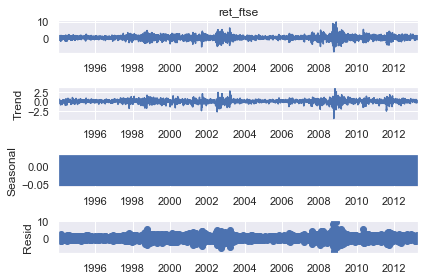

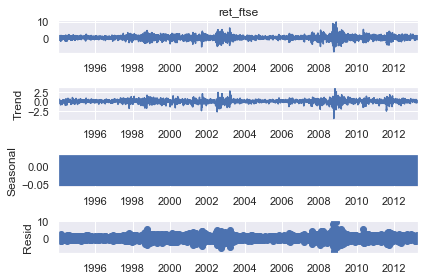

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.ret_ftse[1:], model = 'additive')
decomposition.plot()

#### HOW TO USE auto_arima to the fullest

Altering default values of auto_arima

In [43]:
# If using 'aic', we need to plug in the training set
model_auto_aic = auto_arima(df.ret_ftse[1:], exogenous = df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
                        m = 5, max_order = None, max_p = 7, max_q = 7, max_d = 2,
                        max_P = 4, max_Q = 4, max_D = 2,
                        maxiter = 50, alpha = 0.05, n_jobs = -1,
                        trend = 'ct',
                        information_criterion = "aic")

$exogenous:$ Outside Factors (e.g. other time series)

$m:$ Seasonal Cycle Length (margin)

$max order:$ maximum amount of variables to be used in the regression (p + q) (keep it to 10 or None)

(Trend order are denoted by small_case p, d & q)

$maxp:$ maximum AR components

$maxq:$ maximum MA components

$maxd:$ maximum Integrations

(Seasonal order are denoted by Upper_case P, D & Q

$maxP:$

$maxQ:$

$max_D:$

$Maxiter:$ maximum interations we are giving the model to converge the coefficients (becomes harder as the order increses)

$alpha:$ Level of significance, default is 5% which we should be using most of the time.

$njobs:$ how many models to fit at a time (-1 indicates 'as many as possible")

$trend:$ "ct" usually

information criterion -> "aic", "aicc", "bic", "hqic", "oob" - for validation scoring -- respectively

(Akaike Information Criterion, Corrected Akaike Information Criterion,
Bayesian Information Criterion, Hannan-Quinn Information Criterion, or Out of Bag)

In [45]:
model_auto_aic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                         
=================================================================================================
Dep. Variable:                                         y   No. Observations:                 5019
Model:             SARIMAX(0, 0, 1)x(0, 0, [1, 2, 3], 5)   Log Likelihood               -5316.805
Date:                                   Sat, 14 May 2022   AIC                          10653.610
Time:                                           15:21:47   BIC                          10718.820
Sample:                                       01-10-1994   HQIC                         10676.460
                                            - 04-04-2013                                         
Covariance Type:                                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0057      0.017     -0.338      0.735      -0.039       0.027
drift       4.553e-07   6.12e-06      0.074      0.941   -1.15e-05    1.25e-05
ret_spx        0.0852      0.006     13.335      0.000       0.073       0.098
ret_dax        0.5629      0.006    100.667      0.000       0.552       0.574
ret_nikkei     0.0748      0.005     15.435      0.000       0.065       0.084
ma.L1         -0.1189      0.008    -14.239      0.000      -0.135      -0.103
ma.S.L5       -0.0345      0.010     -3.588      0.000      -0.053      -0.016
ma.S.L10      -0.0547      0.010     -5.308      0.000      -0.075      -0.034
ma.S.L15      -0.0264      0.010     -2.652      0.008      -0.046      -0.007
sigma2         0.4895      0.005     89.585      0.000       0.479       0.500
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             11027.31
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                             0.23
Prob(H) (two-sided):                  0.26   Kurtosis:                        10.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
# If using "oob" then need to plug in whole dataset,
# so need to change df.ret_ftse to df_comp.ret_ftse in endogenous & exogenous variable field.
# When using "oob", then out_of_sample_size need to mentioned with fail.
model_auto_oob = auto_arima(df.ret_ftse[1:], exogenous = df[['ret_spx', 'ret_dax', 'ret_nikkei']][1:],
                        m = 5, max_order = None, max_p = 7, max_q = 7, max_d = 2,
                        max_P = 4, max_Q = 4, max_D = 2,
                        maxiter = 50, alpha = 0.05, n_jobs = -1,
                        trend = 'ct',
                        information_criterion = "oob", out_of_sample_size = int(len(df.ret_ftse[1:]) * 0.2)
                       )

In [47]:
model_auto_oob.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5019
Model:                        SARIMAX   Log Likelihood               -5382.053
Date:                Sat, 14 May 2022   AIC                          10776.107
Time:                        15:26:22   BIC                          10815.233
Sample:                             0   HQIC                         10789.817
                               - 5019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0016      0.025     -0.063      0.950      -0.050       0.047
drift      -2.048e-06   8.84e-06     -0.232      0.817   -1.94e-05    1.53e-05
x1             0.0748      0.007     10.995      0.000       0.061       0.088
x2             0.5518      0.006     92.619      0.000       0.540       0.563
x3             0.0828      0.005     15.889      0.000       0.073       0.093
sigma2         0.5554      0.006     95.084      0.000       0.544       0.567
===================================================================================
Ljung-Box (L1) (Q):                  66.04   Jarque-Bera (JB):             15888.63
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""